In [12]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("covid_instagram.csv")
from sklearn.feature_extraction.text import CountVectorizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

In [13]:
print(df.head())

        PostID                                   Post Description        Date  \
0  B7mbLCVhYIf  QUESTIONS AND ANSWERS ON CORONAVIRUS PT. 2\n\n...  01/21/2020   
1  B7o2ozppOnS  #Viral China no deja salir a #11millones de ci...  01/22/2020   
2  B7nMy1Xl7st  Önce tedbir sonra tevekkül inşallah. Wuhanda o...  01/22/2020   
3  B7m7M3SgvI1  Using humor to bring attention to a serious ma...  01/22/2020   
4  B7oK_DMhtxr  Stay safe\nCover your face\n#typ262 #40mm #40m...  01/22/2020   

  Language Code Full Language Sentiment  
0            en       English  positive  
1            es       Spanish  negative  
2            tr       Turkish  negative  
3            en       English  negative  
4            en       English  positive  


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500153 entries, 0 to 500152
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   PostID            500153 non-null  object
 1   Post Description  500153 non-null  object
 2   Date              500153 non-null  object
 3   Language Code     500153 non-null  object
 4   Full Language     500153 non-null  object
 5   Sentiment         500153 non-null  object
dtypes: object(6)
memory usage: 22.9+ MB
None


In [15]:
print(df.isna().sum())
print(df['PostID'].nunique(), len(df))
df['text_length'] = df['Post Description'].str.len()
df['text_length'].describe()

PostID              0
Post Description    0
Date                0
Language Code       0
Full Language       0
Sentiment           0
dtype: int64
500153 500153


count    500153.000000
mean        518.377389
std         376.034211
min           6.000000
25%         273.000000
50%         427.000000
75%         648.000000
max        2505.000000
Name: text_length, dtype: float64

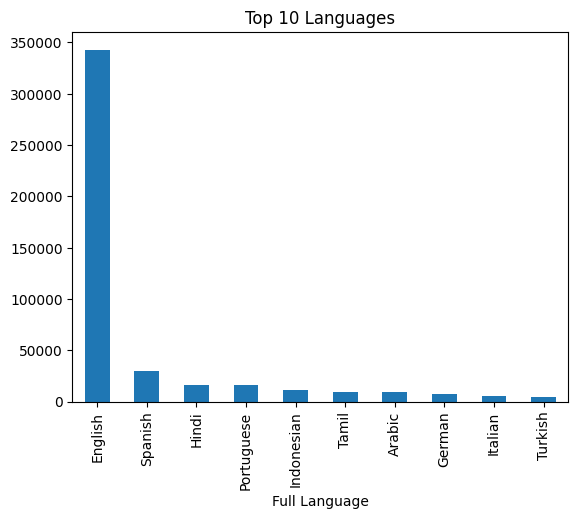

In [16]:
top_langs = df['Full Language'].value_counts().head(10)
top_langs.plot(kind='bar', title="Top 10 Languages")
plt.show()

/var/folders/25/qdj6v0q16nj947n0zplvjg5r0000gp/T/ipykernel_6966/3445147947.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby([pd.Grouper(key='Date', freq='M'), 'Sentiment'])


<Axes: title={'center': 'Sentiment over time'}, xlabel='Date'>

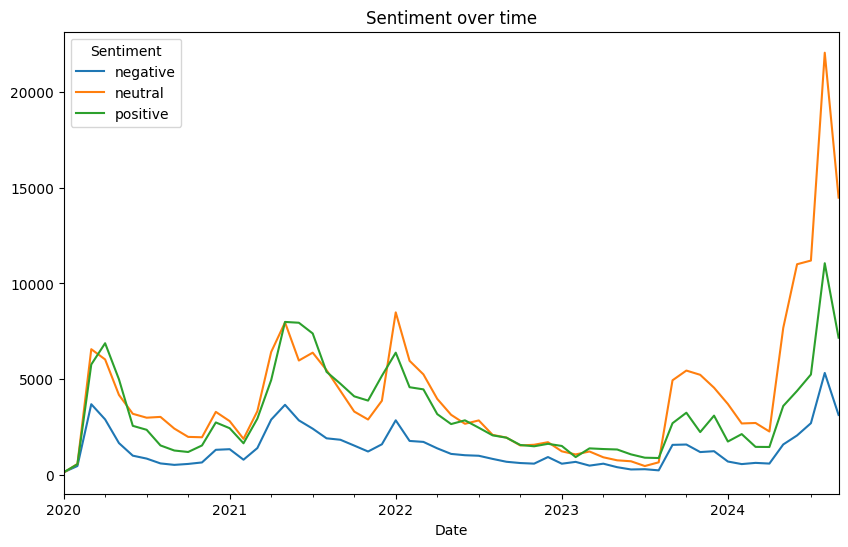

In [17]:
df['Date'] = pd.to_datetime(df['Date'])
sentiment_over_time = (
    df.groupby([pd.Grouper(key='Date', freq='M'), 'Sentiment'])
    .size()
    .unstack(fill_value=0)
)
sentiment_over_time.plot(kind='line', figsize=(10,6), title="Sentiment over time")

/var/folders/25/qdj6v0q16nj947n0zplvjg5r0000gp/T/ipykernel_6966/3821313925.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  subset.groupby([pd.Grouper(key='Date', freq='M'), 'Sentiment'])


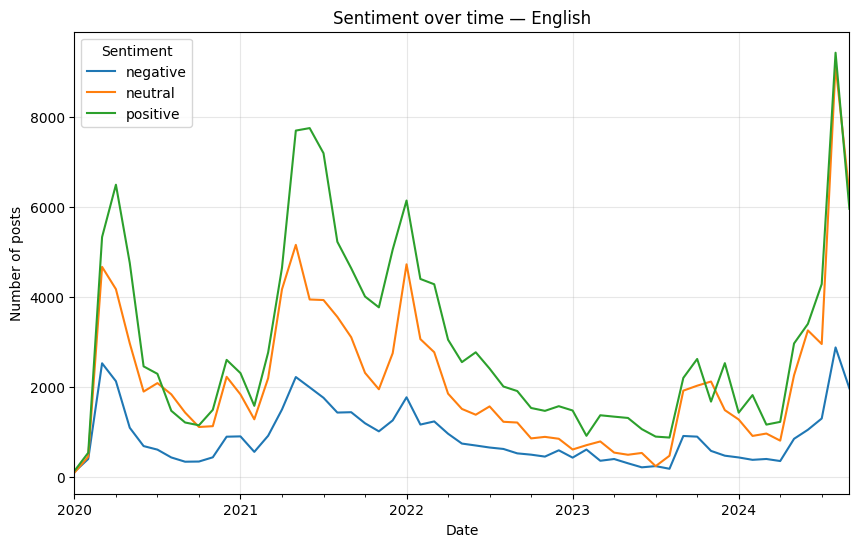

/var/folders/25/qdj6v0q16nj947n0zplvjg5r0000gp/T/ipykernel_6966/3821313925.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  subset.groupby([pd.Grouper(key='Date', freq='M'), 'Sentiment'])


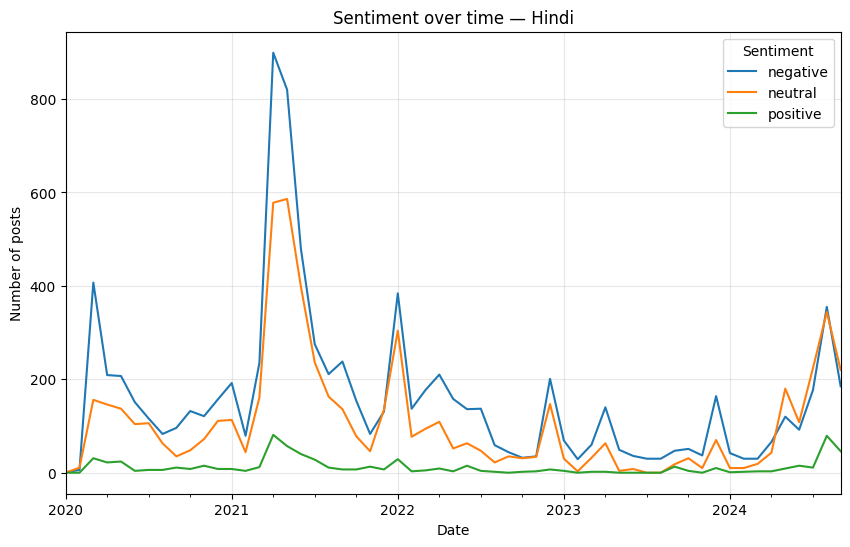

/var/folders/25/qdj6v0q16nj947n0zplvjg5r0000gp/T/ipykernel_6966/3821313925.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  subset.groupby([pd.Grouper(key='Date', freq='M'), 'Sentiment'])


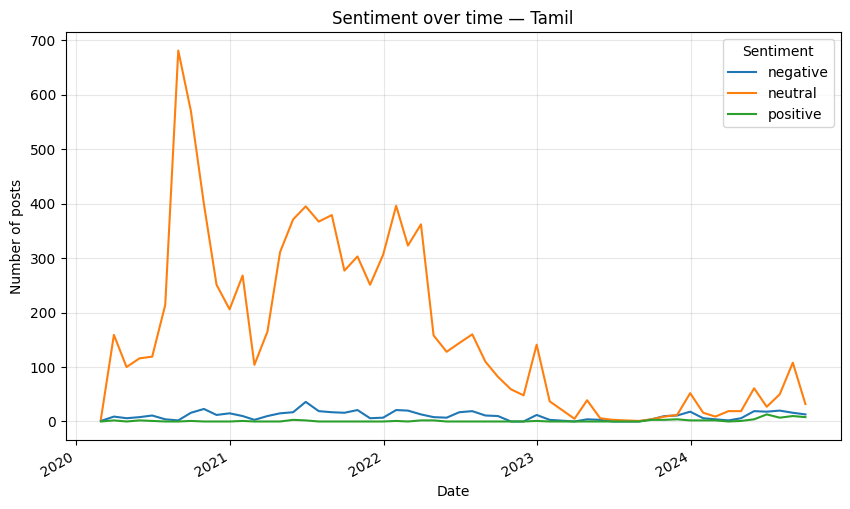

In [18]:
df['Date'] = pd.to_datetime(df['Date'])
languages = ['English', 'Hindi', 'Tamil']
for lang in languages:
    subset = df[df['Full Language'] == lang]
    sentiment_over_time = (
        subset.groupby([pd.Grouper(key='Date', freq='M'), 'Sentiment'])
        .size()
        .unstack(fill_value=0)
    )
    sentiment_over_time.plot(
        kind='line',
        figsize=(10, 6),
        title=f"Sentiment over time — {lang}"
    )
    
    plt.xlabel("Date")
    plt.ylabel("Number of posts")
    plt.grid(True, alpha=0.3)
    plt.show()


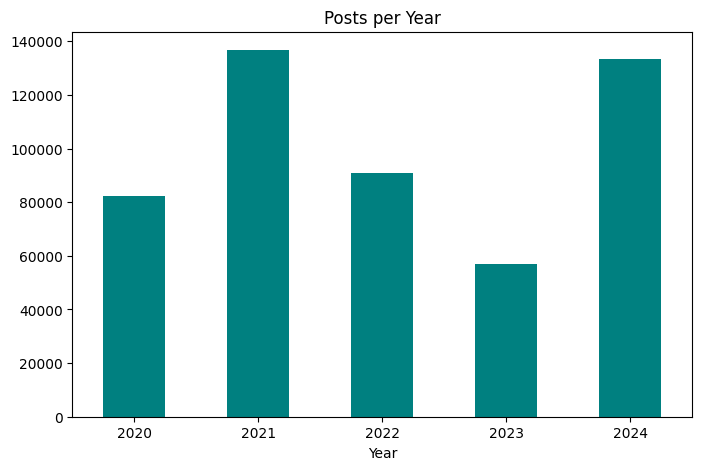

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
year_counts = df.groupby('Year').size()
year_counts.plot(kind='bar', figsize=(8,5), color="teal", title="Posts per Year")
plt.xticks(rotation=0)
plt.show()

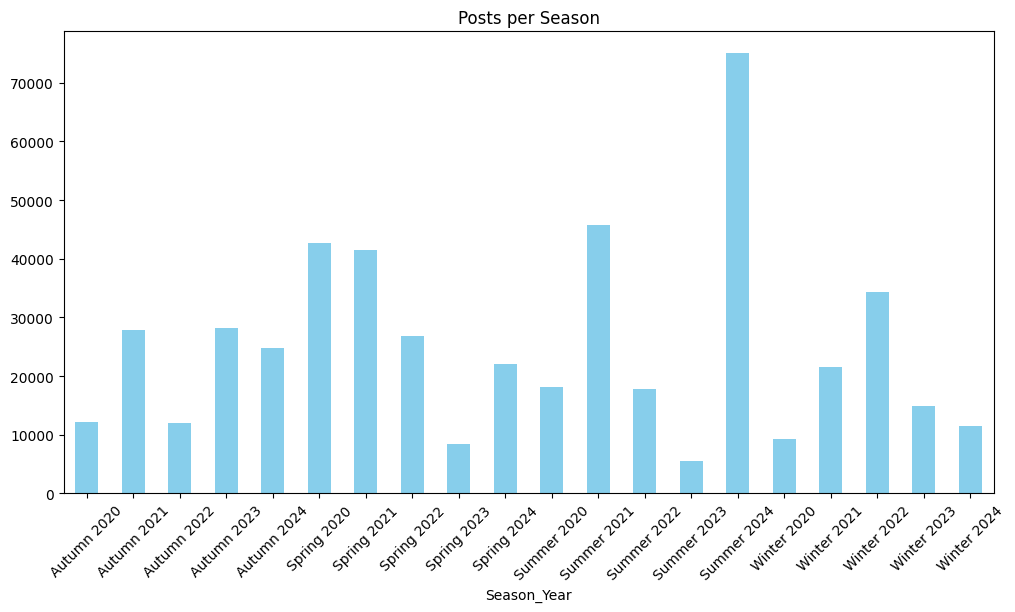

In [20]:
df['Date'] = pd.to_datetime(df['Date'])
def get_season(month):
    if month in [3,4,5]:
        return "Spring"
    elif month in [6,7,8]:
        return "Summer"
    elif month in [9,10,11]:
        return "Autumn"
    else:
        return "Winter"

df['Season'] = df['Date'].dt.month.map(get_season)
df['Year'] = df['Date'].dt.year
df['Season_Year'] = df['Season'] + " " + df['Year'].astype(str)
season_counts = df.groupby('Season_Year').size()
season_counts.plot(kind='bar', figsize=(12,6), color="skyblue", title="Posts per Season")
plt.xticks(rotation=45)
plt.show()

In [ ]:
cv = CountVectorizer(ngram_range=(2,3), max_features=30, stop_words="english")
ngrams = cv.fit_transform(df['Post Description'])
print(cv.get_feature_names_out())

Sentiment
neutral     47.418290
positive    36.840527
negative    15.741183
Name: proportion, dtype: float64


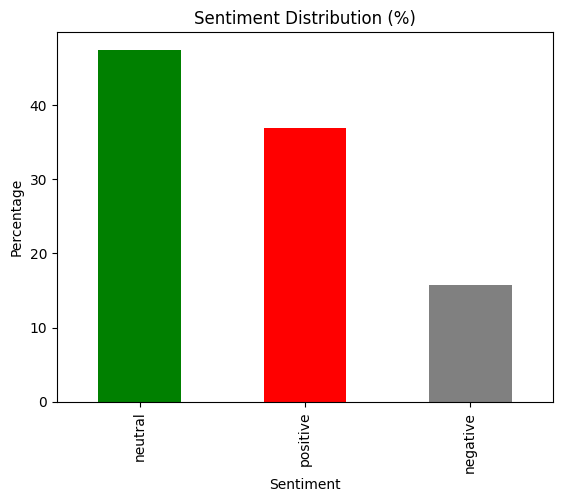

In [ ]:
sent_dist = df['Sentiment'].value_counts(normalize=True) * 100
print(sent_dist)
sent_dist.plot(kind='bar', color=["green","red","gray"], title="Sentiment Distribution (%)")
plt.ylabel("Percentage")
plt.show()

Sentiment                     negative    neutral   positive
Full Language Full Language                                 
Arabic        Arabic          6.850042  76.720476  16.429482
English       English        14.841083  35.475351  49.683566
German        German         11.275889  82.140118   6.583994
Hindi         Hindi          57.042698  38.561142   4.396160
Indonesian    Indonesian      8.075885  77.251762  14.672352
Italian       Italian        21.018985  68.849283  10.131732
Portuguese    Portuguese      7.978959  85.493377   6.527663
Spanish       Spanish         8.951026  84.043680   7.005295
Tamil         Tamil           6.036280  93.160967   0.802752
Turkish       Turkish        13.255613  69.106218  17.638169


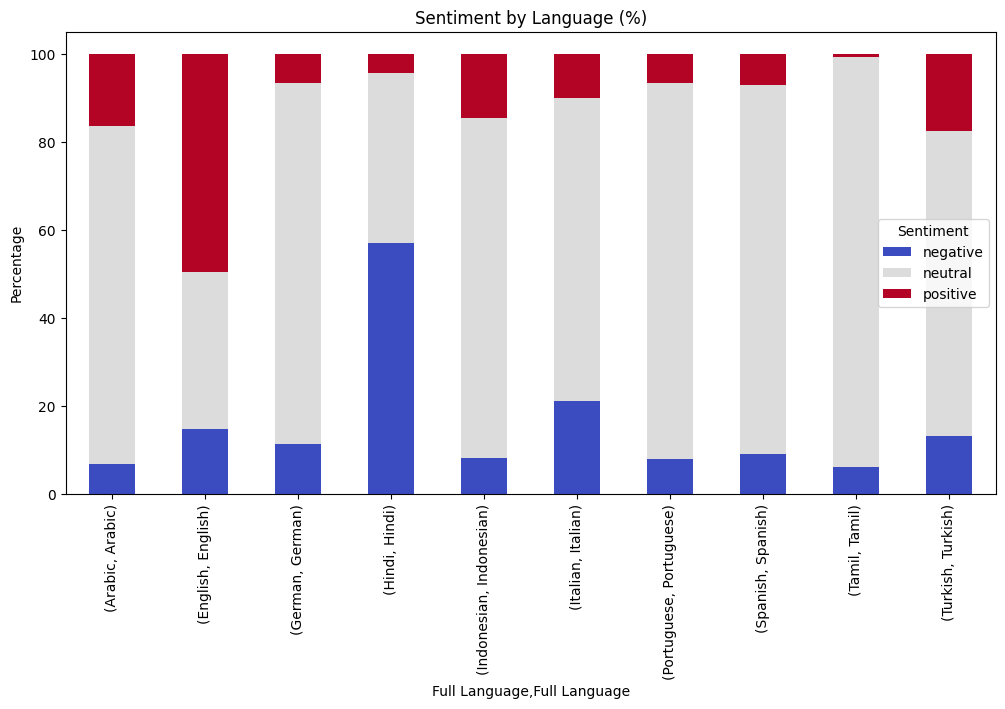

In [ ]:
top_langs = df['Full Language'].value_counts().head(10).index
lang_sent = df[df['Full Language'].isin(top_langs)]
lang_sent_dist = (
    lang_sent.groupby(['Full Language', 'Sentiment'])
    .size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())  # у %
    .unstack(fill_value=0)
)

print(lang_sent_dist)
lang_sent_dist.plot(kind="bar", stacked=True, figsize=(12,6), colormap="coolwarm", title="Sentiment by Language (%)")
plt.ylabel("Percentage")
plt.show()